In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Load the dataset
data = pd.read_csv('Data_bank_churn.csv')
X = data.iloc[:, 3:13].values
y = data.iloc[:, 13].values
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#Check for missing values
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#Check for duplicates
data.duplicated().sum()

0

In [6]:
#statistical summary
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
#check for unique values in the dataset
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
#check for the distribution of the target variable
data['Exited'].value_counts()


Exited
0    7963
1    2037
Name: count, dtype: int64

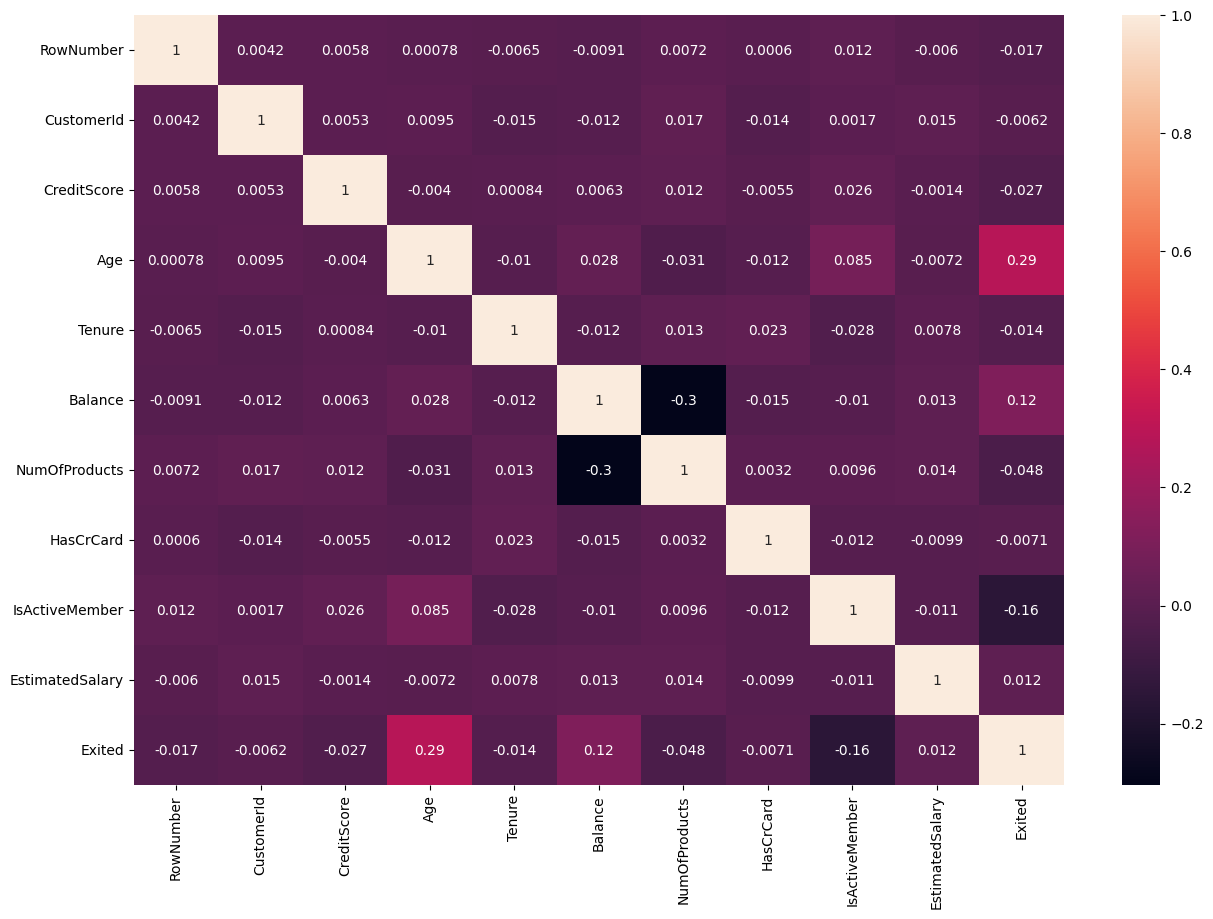

In [9]:
# Exclude non-numeric columns from correlation calculation
numeric_data = data.select_dtypes(include=[np.number])
corr = numeric_data.corr()

# Rest of the code remains the same
plt.figure(figsize=(15,10))
import seaborn as sns
sns.heatmap(corr, annot=True)
plt.show()


In [10]:
# Mengonversi data kategori jenis kelamin menjadi numerik
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])

In [11]:
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(columnTransformer.fit_transform(X), dtype=float)

# Menghilangkan 1 dummy variabel di kolom negara
X = X[:, 1:]


In [12]:
# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Mengimpor library Keras dan turunannya
# Sekarang menggunakan TensorFlow 2.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inisialisasi ANN
MesinKlasifikasi = Sequential()
# Menambah input layer dan hidden layer pertama
MesinKlasifikasi.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
# Menambah hidden layer kedua
MesinKlasifikasi.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Menambah output layer
MesinKlasifikasi.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
# Meenjalankan ANN
MesinKlasifikasi.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting ANN ke training set
MesinKlasifikasi.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100


d:\kuliah\Semester 6\ML\Tugas 2 SVM\svm_c\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 746us/step - accuracy: 0.7946 - loss: 0.5530
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 733us/step - accuracy: 0.7979 - loss: 0.4267
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.7960 - loss: 0.4289
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.8241 - loss: 0.4156
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 769us/step - accuracy: 0.8268 - loss: 0.4113
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - accuracy: 0.8266 - loss: 0.4130
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 744us/step - accuracy: 0.8278 - loss: 0.4165
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 767us/step - accuracy: 0.8336 - loss: 0.4137
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 0.8260 - loss: 0.4138
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8266 - loss: 0.4214
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 783us/step - accuracy: 0.8271 - loss: 0.4213
Epoch 12/100
800/800 ━━━━━━━━━━

In [14]:
#summary
MesinKlasifikasi.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 365 (1.43 KB)

 Trainable params: 121 (484.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 244 (980.00 B)

In [15]:
# Memprediksi hasil test set
y_pred = MesinKlasifikasi.predict(X_test)
y_pred = (y_pred > 0.5)
# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [16]:
# Evaluasi model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1595
           1       0.69      0.36      0.47       405

    accuracy                           0.84      2000
   macro avg       0.77      0.66      0.69      2000
weighted avg       0.82      0.84      0.82      2000

